In [1]:
#load packages
import os
import sys
import scanpy as sc
import pandas as pd
import numpy as np
os.chdir('/Users/ligk2e/Desktop/scTriangulate')
sys.path.append('.')

from sctriangulate import *

In [2]:
# load data
adata = sc.read('pbmc3k_azimuth_umap.h5ad')

In [3]:
# instantiate ScTriangulate object
sctri = ScTriangulate(dir='./output',adata=adata,query=['leiden1','leiden2','leiden3'],reference='leiden1',
                      species='human',criterion=2,verbose=1)

In [4]:
# do you want to add more metrics
sctri.add_new_metrics({'tfidf5':tf_idf5_for_cluster})

In [5]:
# doublet prediction
sctri.doublet_predict() 

Preprocessing...


/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 48.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.4%
Elapsed time: 2.1 seconds


In [6]:
# compute metrics
sctri.compute_metrics(parallel=False)

/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'leiden1' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden2' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden3' as categorical
2021-06-10 23:30:12,678 - INFO - Process 21862, for leiden1, finished marker genes finding
/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Nu

In [7]:
# penalize artifact (certain clusters or cell cycle or whatever)
sctri.penalize_artifact(mode='void',stamps=['leiden1@2'],parallel=False)

In [8]:
# compute shapley
sctri.compute_shapley(parallel=False)

2021-06-10 23:33:50,615 - INFO - process 21862 need to process 2638 cells for shapley computing
2021-06-10 23:33:59,351 - INFO - process 21862 need to process 2638 cells for raw sctriangulte result


In [10]:
# inspection and visualization (heterogeneity)
print(sctri)

ScTriangualate Object:
Working directory is ./output
Query Annotation: ['leiden1', 'leiden2', 'leiden3']
Reference Annotation: leiden1
Species: human
Criterion: 2
Total Metrics: ['reassign', 'tfidf10', 'SCCAF', 'doublet', 'tfidf5']
Score slot contains: ['leiden1', 'leiden2', 'leiden3']
Cluster slot contains: ['leiden1', 'leiden2', 'leiden3']
Uns slot contains: ['confusion_reassign', 'confusion_sccaf', 'marker_genes', 'exclusive_genes']
Invalid cluster: ['leiden1@2']


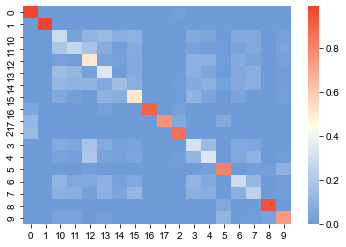

In [10]:
# confusion plot
sctri.plot_confusion(name='confusion_reassign',key='leiden2',save=False,format='png')

... storing 'leiden1' as categorical
... storing 'leiden2' as categorical
... storing 'leiden3' as categorical
... storing 'final_annotation' as categorical
... storing 'raw' as categorical
... storing 'prefixed' as categorical


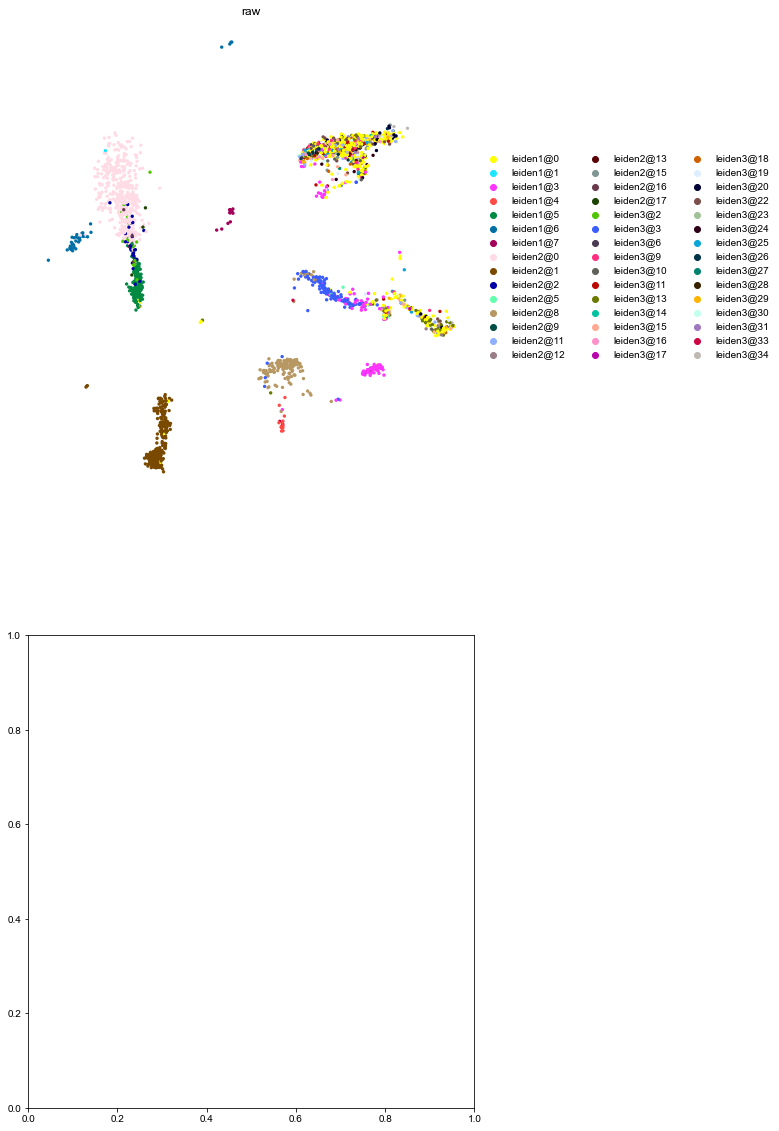

In [11]:
# umap
sctri.plot_umap(col='raw',kind='category',save=False,format='png')

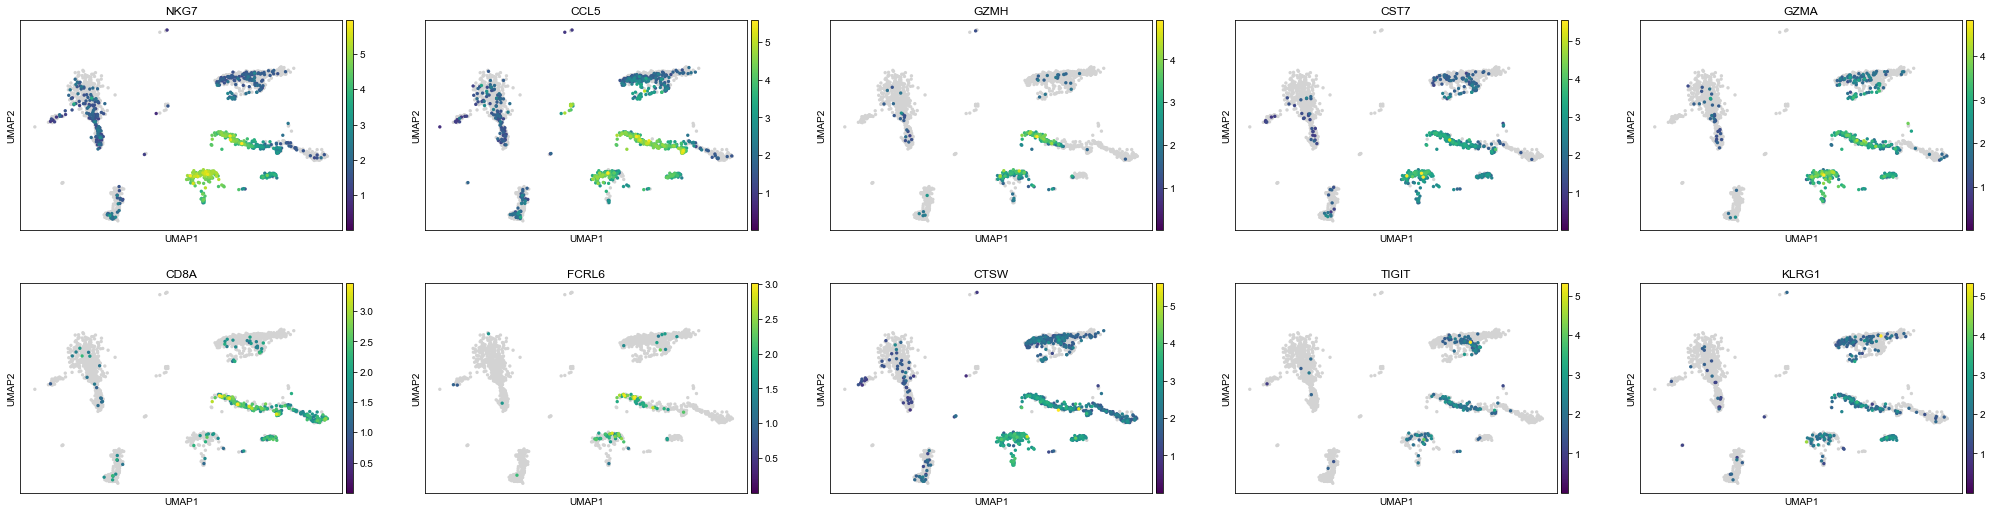

In [12]:
# cluster feature
sctri.plot_cluster_feature(key='leiden2',cluster='5',feature='marker_genes',save=False,format='png')

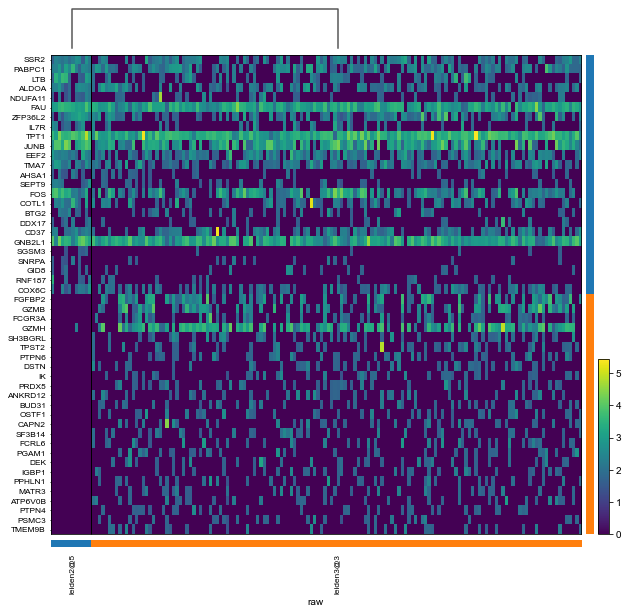

In [13]:
# heterogeneity heatmap
sctri.plot_heterogeneity(key='leiden2',cluster='5',col='raw',style='heatmap',save=False,format='png')

... storing 'leiden1' as categorical
... storing 'leiden2' as categorical
... storing 'leiden3' as categorical
... storing 'final_annotation' as categorical
... storing 'raw' as categorical
... storing 'prefixed' as categorical


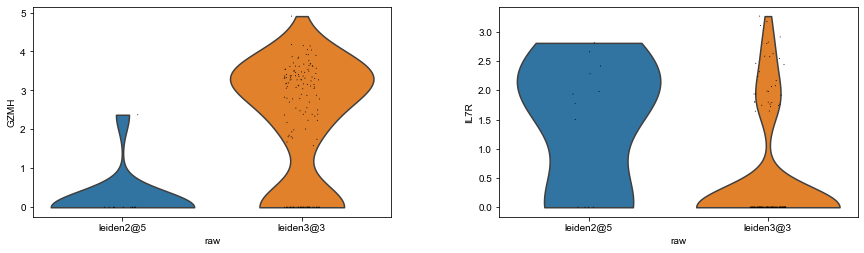

In [12]:
# heterogeneity violin
sctri.plot_heterogeneity(key='leiden2',cluster='5',col='raw',style='violin',save=False,format='png',genes=['GZMH','IL7R'])

['ref:leiden2@5', 'leiden2', 'leiden3', 'leiden2@5', 'leiden3@3'] ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3'] [0, 1, 0, 2] [1, 3, 2, 4] (12, 12, 146, 146) ['#8dd3c7', '#ffffb3', '#8dd3c7', '#bebada']


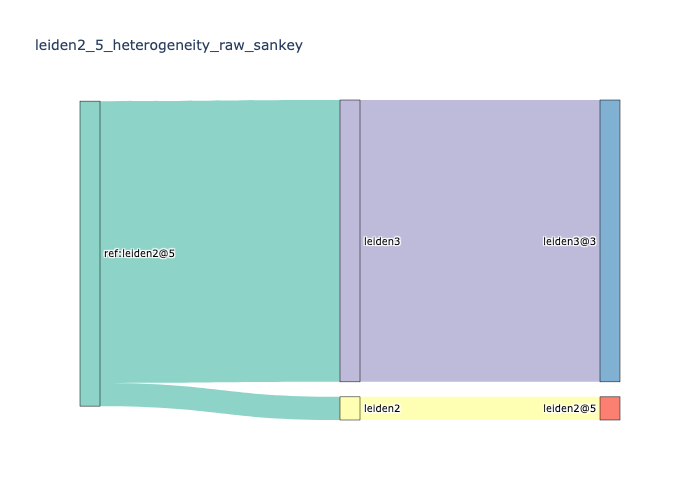

In [20]:
# heterogeneity sankey
sctri.plot_heterogeneity(key='leiden2',cluster='5',col='raw',style='sankey',save=True,format='png')
from IPython.display import Image
Image(filename='output/leiden2_5_heterogeneity_raw_sankey.png')

leiden2  raw       
0        leiden2@0     412
1        leiden2@1     341
10       leiden1@3       1
         leiden3@10     35
         leiden3@11     47
                      ... 
9        leiden1@4      14
         leiden2@9       4
         leiden3@3       2
         leiden3@33      3
         leiden3@6       4
Name: value, Length: 97, dtype: int64
   leiden2         raw  value
0        0   leiden2@0    412
1        1   leiden2@1    341
2       10   leiden1@3      1
3       10  leiden3@10     35
4       10  leiden3@11     47
..     ...         ...    ...
92       9   leiden1@4     14
93       9   leiden2@9      4
94       9   leiden3@3      2
95       9  leiden3@33      3
96       9   leiden3@6      4

[97 rows x 3 columns]


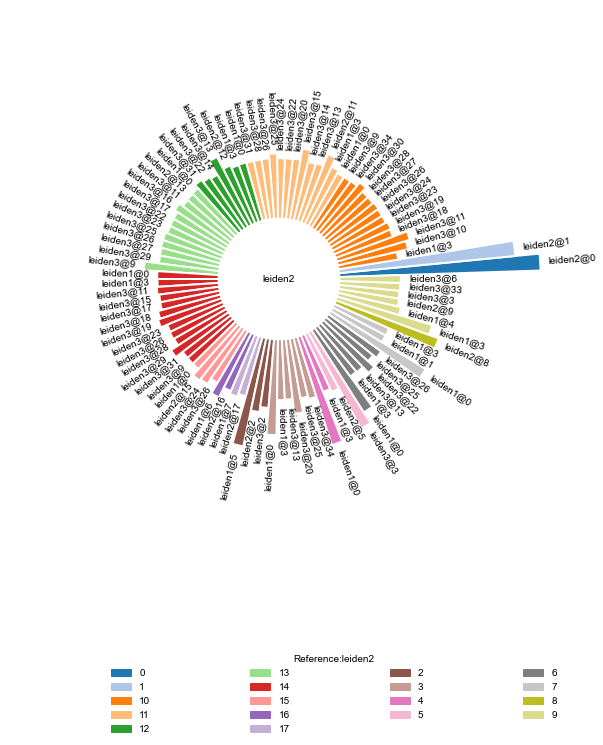

In [13]:
# circular barplot
sctri.plot_circular_barplot(key='leiden2',col='raw',save=False,format='png')

In [14]:
# rank pruning (compute raw cluster goodness)
sctri.pruning(method='rank',discard=None)

/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'leiden1' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden2' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden3' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'final_annotation' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'raw' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'prefixed' as categorical
2021-06-10 23:37:02,318 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-06-10 23:37:04,769 No gene sets passed through filtering condition!!!, try new parameters again!
No

{'cluster_to_reassign': {'leiden1@0': 0.04868913857677903, 'leiden1@3': 0.6204379562043796, 'leiden1@4': 0.9285714285714286, 'leiden1@5': 0.8108108108108109, 'leiden1@6': 0.9444444444444444, 'leiden1@7': 1.0, 'leiden2@0': 0.8398058252427184, 'leiden2@1': 0.9706744868035191, 'leiden2@11': 0.05128205128205128, 'leiden2@12': 0.6666666666666666, 'leiden2@13': 1.0, 'leiden2@15': 0.2, 'leiden2@16': 1.0, 'leiden2@17': 0.75, 'leiden2@2': 0.5365853658536586, 'leiden2@5': 0.5833333333333334, 'leiden2@8': 0.9383561643835616, 'leiden2@9': 1.0, 'leiden3@10': 0.2, 'leiden3@11': 0.05555555555555555, 'leiden3@13': 0.4, 'leiden3@14': 1.0, 'leiden3@15': 0.1388888888888889, 'leiden3@16': 0.38461538461538464, 'leiden3@17': 0.6, 'leiden3@18': 0.29411764705882354, 'leiden3@19': 0.037037037037037035, 'leiden3@2': 0.3076923076923077, 'leiden3@20': 0.2608695652173913, 'leiden3@22': 0.34210526315789475, 'leiden3@23': 1.0, 'leiden3@24': 0.22727272727272727, 'leiden3@25': 0.44, 'leiden3@26': 0.5517241379310345, '

In [15]:
sctri.uns['raw_cluster_goodness']

,cluster_to_reassign,cluster_to_tfidf10,cluster_to_SCCAF,cluster_to_tfidf5,appro_shapley,scaled_shapley,cluster_size
leiden1@7,1.000000,1.620699,0.666667,1.808065,11.792436,1.000000,13
leiden2@9,1.000000,1.082464,0.000000,1.348209,9.966998,0.845203,4
leiden2@8,0.938356,0.914579,0.876712,1.096784,8.823684,0.748249,146
leiden2@2,0.536585,1.287215,0.000000,1.408126,7.673770,0.650737,41
leiden1@6,0.944444,0.692553,1.000000,0.787940,7.598246,0.644332,36
leiden3@6,0.750000,0.994386,0.000000,1.163380,7.385480,0.626290,4
leiden2@1,0.970674,0.480809,0.994152,0.590926,6.996469,0.593301,341
leiden2@13,1.000000,0.675316,0.000000,0.725162,6.144531,0.521057,2
leiden3@3,0.804054,0.764450,0.689189,0.817813,6.103286,0.517559,148
leiden1@5,0.810811,0.628396,0.945946,0.697862,6.096950,0.517022,148


In [16]:
# reassign pruning
sctri.pruning(method='reassign',abs_thresh=10,remove1=True,reference='leiden2')

/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
/opt/anaconda3/envs/sctriangulate/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
# building viewer
sctri.viewer_cluster_feature_figure()
sctri.viewer_cluster_feature_html()

sctri.viewer_heterogeneity_figure(keys=['leiden3'])
sctri.viewer_heterogeneity_html(key='leiden3')

In [18]:
# celltype spreadsheet
pd.read_csv('output/celltype.txt',sep='\t',index_col=0)

,cell_cluster,choice
reference,,
leiden1@0,leiden1@3,1
leiden1@0,leiden1@0,1
leiden1@0,leiden3@19,1
leiden1@0,leiden3@18,1
leiden1@0,leiden3@13,2
leiden1@0,leiden3@31,2
leiden1@0,leiden3@11,2
leiden1@0,leiden2@15,2
leiden1@0,leiden3@20,2


In [19]:
# user-curated final cluster
sctri.get_cluster()

In [20]:
sctri.adata.obs

,azimuth,prediction_score,mapping_score,azimuth_umap1,azimuth_umap2,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden1,...,raw,prefixed,reassign@raw,tfidf10@raw,SCCAF@raw,doublet@raw,tfidf5@raw,pruned,ori,user_choice
AAACATACAACCAC-1,CD8 TCM,0.811214,0.875263,8.265203,-4.385519,781,2421.0,73.0,3.015283,0,...,leiden2@9,leiden1@0|leiden1@3,1.000000,0.869833,0.000000,0.162245,0.925149,leiden1@3,0,leiden1@0|leiden1@3+leiden1@0+leiden3@19+leide...
AAACATTGAGCTAC-1,B intermediate,0.647723,0.988092,-6.437743,-10.873022,1352,4903.0,186.0,3.793596,2,...,leiden2@1,leiden1@2|leiden2@1,0.970674,0.480809,0.994152,0.070271,0.590926,leiden2@1,1,leiden1@2|leiden2@1
AAACATTGATCAGC-1,CD4 TCM,0.827950,0.702025,6.522650,5.302032,1131,3149.0,28.0,0.889171,0,...,leiden1@0,leiden1@0|leiden1@0,0.048689,0.234458,0.756554,0.112681,0.240412,leiden1@0,2,leiden1@0|leiden1@3+leiden1@0+leiden3@19+leide...
AAACCGTGCTTCCG-1,CD14 Mono,0.626537,0.979082,-8.634759,0.364101,960,2639.0,46.0,1.743085,1,...,leiden3@2,leiden1@1|leiden3@2,0.307692,0.487800,0.000000,0.058880,0.518450,leiden3@2,3,leiden1@1|leiden3@2+leiden2@0+leiden2@2+leiden...
AAACCGTGTATGCG-1,NK,1.000000,0.963421,2.269989,-7.657887,522,981.0,12.0,1.223242,4,...,leiden2@8,leiden1@4|leiden2@8,0.938356,0.675316,0.876712,0.050280,0.725162,leiden2@8,4,leiden1@4|leiden2@8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,CD14 Mono,1.000000,0.925947,-9.000906,2.526388,1155,3461.0,73.0,2.109217,1,...,leiden2@16,leiden1@1|leiden1@6,1.000000,0.914579,0.000000,0.066855,1.096784,leiden1@6,2633,leiden1@1|leiden3@2+leiden2@0+leiden2@2+leiden...
TTTCTACTGAGGCA-1,Plasmablast,0.895082,0.993702,-11.495870,-9.107556,1227,3447.0,32.0,0.928343,2,...,leiden2@1,leiden1@2|leiden2@1,0.970674,0.480809,0.994152,0.070271,0.590926,leiden2@1,2634,leiden1@2|leiden2@1
TTTCTACTTCCTCG-1,B naive,0.984453,0.777067,-6.946744,-14.185478,622,1684.0,37.0,2.197150,2,...,leiden2@1,leiden1@2|leiden2@1,0.970674,0.480809,0.994152,0.070271,0.590926,leiden2@1,2635,leiden1@2|leiden2@1
TTTGCATGAGAGGC-1,B intermediate,0.734703,0.941339,-6.295672,-12.799436,454,1024.0,21.0,2.050781,2,...,leiden2@1,leiden1@2|leiden2@1,0.970674,0.480809,0.994152,0.070271,0.590926,leiden2@1,2636,leiden1@2|leiden2@1
